In [2]:
import requests as req
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

In [4]:
fotoku = Image.open(BytesIO(req.get("https://avatars.githubusercontent.com/u/77716310?v=4").content)).convert("RGB")
fotoku_bgr = cv.cvtColor(np.array(fotoku), cv.COLOR_RGB2BGR)

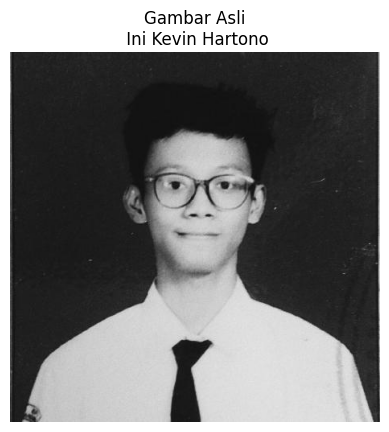

In [ ]:
plt.imshow(cv.cvtColor(fotoku_bgr, cv.COLOR_BGR2RGB))
plt.title("Gambar Asli\n Ini Kevin Hartono")
plt.axis('off')
plt.show()

In [83]:
gray = cv.cvtColor(fotoku_bgr, cv.COLOR_BGR2GRAY)
inverted = cv.bitwise_not(gray)
blurred = cv.GaussianBlur(inverted, (11, 11), 0)
inverted_blur = cv.bitwise_not(blurred)

pencil_vibe = cv.divide(gray, inverted_blur, scale=256.0)

In [ ]:
def cartoonize_image(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blur = cv.medianBlur(gray, 7)
    edges = cv.adaptiveThreshold(blur, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 9, 10)
    color = cv.bilateralFilter(img, 9, 250, 250)
    cartoon = cv.bitwise_and(color, color, mask=edges)
    return cartoon

In [80]:
# Sketch
blurred = cv.GaussianBlur(gray, (5, 5), 1.4)
edges = cv.Canny(blurred, 60, 200)
sketch = cv.bitwise_not(edges)

In [79]:
# Emboss
kernel = np.array([[ -2, -1, 0], [ -1,  1, 1], [  0,  1, 2]])
gray = cv.cvtColor(fotoku_bgr, cv.COLOR_BGR2GRAY)
emboss = cv.filter2D(gray, -1, kernel) + 128

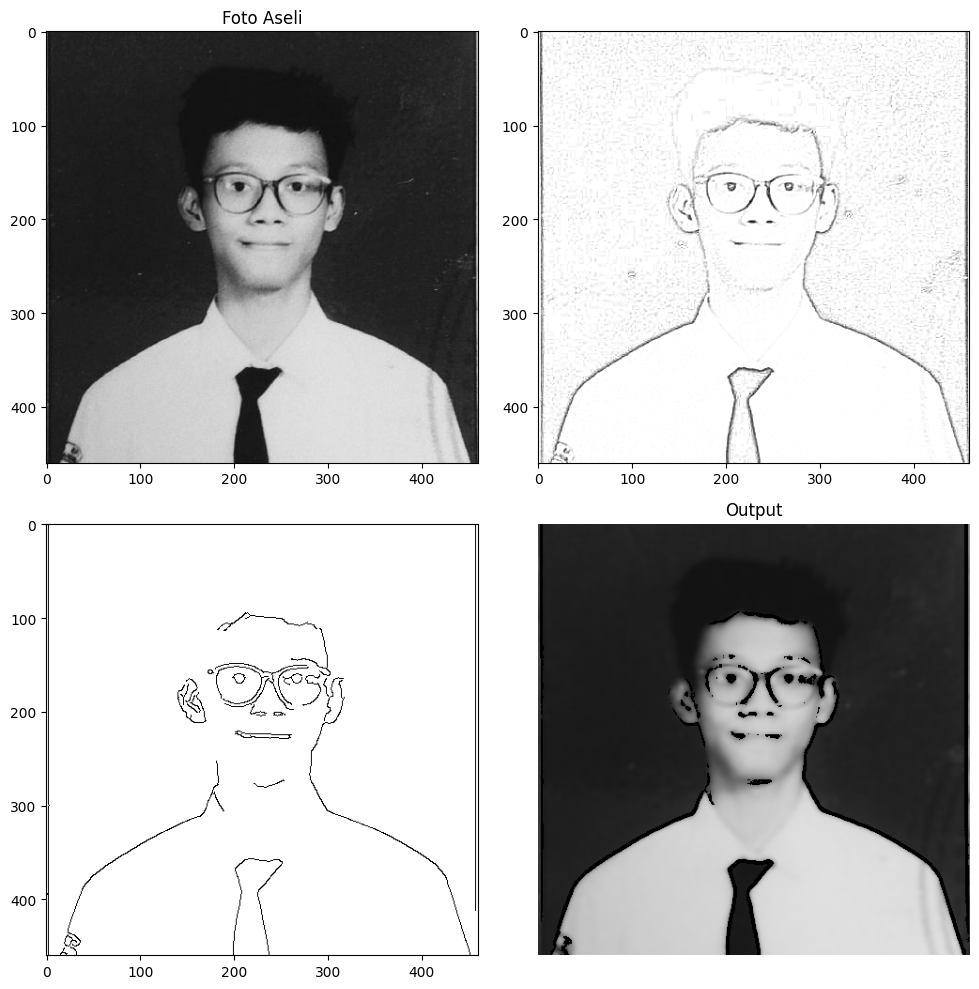

In [89]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(fotoku_bgr)
axs[0, 0].set_title("Foto Aseli")
plt.axis('off')
axs[0, 1].imshow(pencil_vibe, cmap="gray")
plt.axis('off')
axs[1, 0].imshow(sketch, cmap="gray")
# axs[1, 0].imshow(cv.bitwise_not(cv.Canny(gray, 50, 150)), cmap="gray")
plt.axis('off')
axs[1, 1].imshow(cartoonize_image(fotoku_bgr), cmap="gray")
axs[1, 1].set_title("Output")
plt.axis('off')

plt.tight_layout()
plt.show()